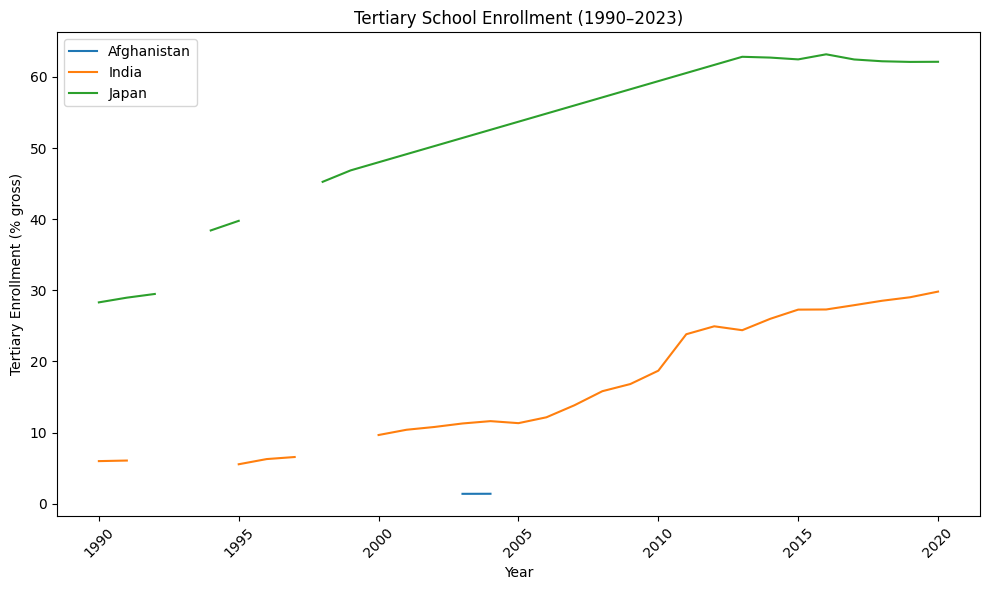

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load each country’s data
japan_df = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/japan_enrollment.csv")
india_df = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/india_enrollment.csv")
afg_df   = pd.read_csv("C:/Users/Abasu/Documents/GitHub/qtm350_project/data/afghanistan_enrollment.csv")

# 2. Tag with country names
japan_df["Country"] = "Japan"
india_df["Country"] = "India"
afg_df["Country"]   = "Afghanistan"

# 3. Combine into one DataFrame
df = pd.concat([japan_df, india_df, afg_df], ignore_index=True)

# 4. Keep only the tertiary column
tertiary = df[["Country", "Year", "Tertiary Enrollment"]].copy()
tertiary.rename(columns={"Tertiary Enrollment": "Enrollment"}, inplace=True)

# 5. Clean Year and filter 1990–2023
tertiary["Year"] = tertiary["Year"].str.extract(r"(\d+)").astype(int)
tertiary = tertiary[(tertiary.Year >= 1990) & (tertiary.Year <= 2023)]

# 6. Plot
plt.figure(figsize=(10, 6))
for country, group in tertiary.groupby("Country"):
    plt.plot(group.Year, group.Enrollment, label=country)

plt.title("Tertiary School Enrollment (1990–2023)")
plt.xlabel("Year")
plt.ylabel("Tertiary Enrollment (% gross)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


intent: visualize and compare tertiary enrollment rates over time for these three countries.